In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('numpy ==', np.__version__, ',' ,'pandas ==', pd.__version__,',','matplotlib==' ,matplotlib.__version__)


NameError: name 'matplotlib' is not defined

## Day4

Milestone Action Items

Download the data set about Value of Energy Cost Saving Program for businesses in New York City (under the "Export" option, there is a way to retrieve a CSV file). Answer the following questions.

1) How many different companies are represented in the data set?

2) What is the total number of jobs created for businesses in Queens?

3) How many different unique email domains names are there in the data set?

4) Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

5) Save your result for the previous question as a CSV file.

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [2]:
# pd.set_option("display.max_columns", None)
df.head()
# df.describe()
# len(df)
# sum(df['Job created'].isna())

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,03/04/2005,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,LMEP,NaN,NaN,NaN,04/02/2008,136578.20,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,LMEP,1238.0,NaN,NaN,01/05/2015,302959.40,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25.0,NaN,NaN,02/03/2020,2159.67,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,2699.0,NaN,NaN,06/30/2017,922407.32,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


##### 1) How many different companies are represented in the data set?

In [3]:
df.columns
# df['Company Name'].nunique()

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [4]:
df['Company Name'].nunique()

439

In [5]:
# repeated company 
al = df['Company Name']
from collections import Counter
c = Counter(al)
cc=[]
for i in c:
    if c[i]>1:
        print(c[i],end=',')
        cc.append(i)
cc
# len(df)-len(cc)-1

2,3,2,2,2,2,2,2,2,2,

['Albert Einstein College of Medicine R&D',
 'FEDERAL EXPRESS',
 'FRESH DIRECT LLC',
 'JetBlue Airways, Corp.',
 'KEPCO, INC.',
 'Magellan Aerospace New York, Inc',
 'MEDITERRANEAN GYRO PRODUCTS',
 'Montefiore Medical Center',
 'SILVERCUP Services LLC',
 'Spin Master, Inc.']

##### 2) What is the total number of jobs created for businesses in Queens?

In [6]:
# not clear if it means Queens listed in city or Borough:

In [7]:
# For Queens in city column
df2 = df[(df['City']=='Queens')|(df['City']=='QUEENS')]
df2['Job created'].sum()

90.0

In [93]:
# For Queens in Borough column
df_2 = df[(df['Borough']=='Queens')|(df['Borough']=='QUEENS')]
df_2['Job created'].sum()

102.0

##### 3) How many different unique email domains names are there in the data set?

In [9]:
# df['company email'].nunique(), sum(df['company email'].isna())
# 'not NA is: 450-17= 433

In [10]:
list_of_all_emails = list(df['company email'])
# list_of_all_emails

In [11]:
valid_emails = []
for i in list_of_all_emails:
#     print(type(i),i)
    if type(i) is str and '@' in i:
        valid_emails.append(i)     
len(valid_emails)
     
# sum(pd.DataFrame(valid_emails).isna())

428

In [12]:
unique_valid_emails_df =pd.DataFrame(valid_emails)
unique_valid_emails_df[0].nunique()

415

In [13]:
#check the result:
# duplicate emails:
# print('number of repeats of repeated emails:')
from collections import Counter
c3 = Counter(valid_emails)
c4=[]
l=[]
for i in c3:
    if c3[i]>1:
        c4.append(i)
        l.append(c3[i])

df3  = pd.DataFrame()
df3['email']=c4
df3['repeats']=l
df3
# 2 emails has been repeated 3 times
len(valid_emails)-len(c4)-2

415

##### 4) Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

* Effective Date :	The date in which the company's ECSP benefits begin

* Total Savings :	How much money the company saved for the fiscal year

* Savings from beginning receiving benefits :	Total amount received from the time the company started getting benefits.

* Job creat :Number of Jobs Created within the year!

In [14]:
d = df.groupby('NTA').agg({'Job created':'sum','Total Savings':'mean','Company Name':'count'})
d4 = d.rename(columns={'Job created':'total_job_created','Total Savings':'ave_total_saving','Company Name':'count_of_business'})
d_4 = d4[d4.count_of_business>=5]
d_4.sort_values(by=['ave_total_saving','total_job_created'],ascending=False)
d_4.head()

,total_job_created,ave_total_saving,count_of_business
NTA,,,
Battery Park City-Lower Manhattan,0.0,469890.796667,9
Bushwick South,10.0,26140.455000,10
Carroll Gardens-Columbia Street-Red Hook,0.0,24337.390000,11
College Point,2.0,17159.372857,7
Crown Heights North,0.0,4036.298889,9


##### 5) Save your result for the previous question as a CSV file.

In [15]:
d_4.to_csv('result_day4.csv')

## Day5 
##### Milestone Action Items: use the same data set and results that you were working with in the pandas action items section (Day 4)
* 1) scatter plot of jobs created versus average savings.Use both a standard and a logarithmic scale for the average savings.
* 2) histogram of the log of the average total savings.
* 3) line plot of the total jobs created for each month.

#### Definition 
* Effective Date : The date in which the company's ECSP benefits begin

* Total Savings : How much money the company saved for the fiscal year

* Savings from beginning receiving benefits : Total amount received from the time the company started getting benefits.

* Job creat :Number of Jobs Created within the year!
* Job retain: Number of Jobs retained within the year
* Last update: May 9, 2022

Note: 
I used the results from Day4:

##### 1) Scatter plot of jobs created versus average savings.Use both a standard and a logarithmic scale for the average savings.

In [157]:
# using ave_saving for each NTA:
d5 = d4.copy()
d5.head()
d_5 = d5[d5['total_job_created']!=0]
d_5

,total_job_created,ave_total_saving,count_of_business
NTA,,,
Bushwick South,10.0,26140.455000,10
College Point,2.0,17159.372857,7
East New York,15.0,48433.093333,9
Hunts Point,12.0,39246.016154,13
Maspeth,10.0,6658.283333,9
Mott Haven-Port Morris,10.0,17843.937857,14
Steinway,20.0,11227.155714,7
Whitestone,10.0,62038.306667,3


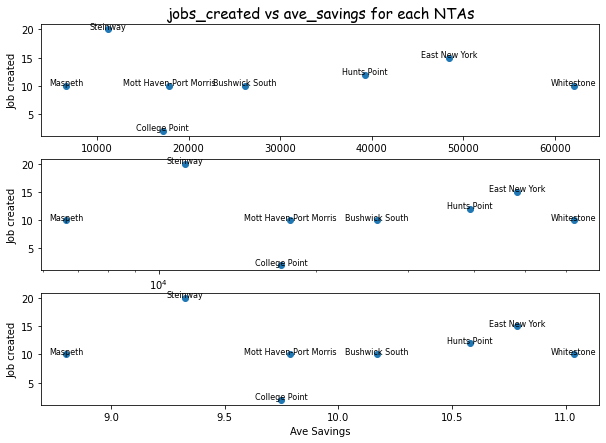

In [98]:
fig, axes = plt.subplots(3,1,figsize=(10,7))
ax1 = axes[0]
x = d_5['ave_total_saving']
y = d_5['total_job_created']
# text = x.index
ax1.scatter(x,y)
ax1.set_title('jobs_created vs ave_savings for each NTAs', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 15})

ax1.set_ylabel('Job created',fontdict={'fontsize': 10})
# for i in range(len(x)):
#     ax1.annotate(x.index[i], (x[i], y[i]+0.1),horizontalalignment='center', size=8)   
# plt.text(x.iloc[0],y.iloc[0],"Bushwick_South", horizontalalignment='left', size=8)
for i in range(len(x)):
    ax1.annotate(x.index[i], (x[i], y[i]+0.1),horizontalalignment='center', size=8)
    
ax2 = axes[1]
x = d_5['ave_total_saving']
y = d_5['total_job_created']
ax2.set_xscale('log')
ax2.scatter(x,y)
# ax2.set_xlabel('Ave Savings',fontdict={'fontsize': 10})
ax2.set_ylabel('Job created',fontdict={'fontsize': 10})
for i in range(len(x)):
    ax2.annotate(x.index[i], (x[i], y[i]+0.1),horizontalalignment='center', size=8)  

ax3 = axes[2]
x3=np.log(x)
ax3.scatter(x3,y)
ax3.set_ylabel('Job created',fontdict={'fontsize': 10})   
ax3.set_xlabel('Ave Savings',fontdict={'fontsize': 10})
for i in range(len(x3)):
    ax3.annotate(x3.index[i], (x3[i], y[i]+0.1),horizontalalignment='center', size=8)
plt.show()
# text


##### 2) histogram of the log of the average total savings.

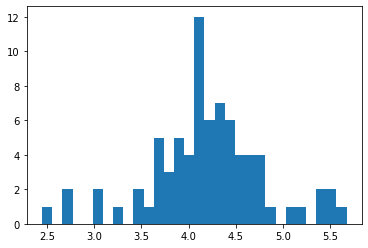

In [155]:
# ave_saving for each NTAs:
s6= d4[d4['ave_total_saving']>0]
s6 = s6.sort_values(by=['ave_total_saving'])
s7 = np.log10(s6['ave_total_saving'])
plt.hist(s7,bins=30)
plt.show()

##### 3) line plot of the total jobs created for each month.
I was not able to find the info related to months to answer the above Q, if I had the total jobs created per months for each business, then the following could have been done:

In [14]:
x7 = ['Jan', 'Feb', 'March', 'Apr', 'May', 
 'June', 'July','Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
# total jobs created for each month:
y7 = [1,2,3,4,5,6,7,8,9,10,11,12]

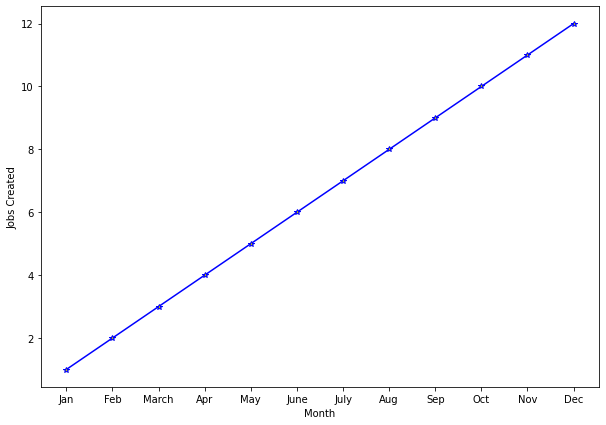

In [21]:
fig, ax1 = plt.subplots(1,1,figsize=(10,7))
# ax1.plot(x7,y7)
ax1.plot(x7, y7, color='b',marker='*',markerfacecolor='y')
plt.xlabel("Month")
plt.ylabel("Jobs Created")
plt.show()
